Đến phòng gym, nhưng quá đông người để chờ đến lượt ?
=> Dự đoán số lượng người tại phòng gym vào một ngày cụ thể

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

sns.set_style("whitegrid")
sns.despine()

<Figure size 640x480 with 0 Axes>

In [ ]:
df = pd.read_csv("crowdness_gym_data.csv")
df

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17
...,...,...,...,...,...,...,...,...,...,...,...
62179,23,2017-03-18 18:42:28-07:00,67348,5,1,0,61.07,0,1,3,18
62180,21,2017-03-18 18:52:35-07:00,67955,5,1,0,61.07,0,1,3,18
62181,25,2017-03-18 19:02:40-07:00,68560,5,1,0,56.71,0,1,3,19
62182,18,2017-03-18 19:12:47-07:00,69167,5,1,0,56.71,0,1,3,19


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62184 entries, 0 to 62183
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   number_people         62184 non-null  int64  
 1   date                  62184 non-null  object 
 2   timestamp             62184 non-null  int64  
 3   day_of_week           62184 non-null  int64  
 4   is_weekend            62184 non-null  int64  
 5   is_holiday            62184 non-null  int64  
 6   temperature           62184 non-null  float64
 7   is_start_of_semester  62184 non-null  int64  
 8   is_during_semester    62184 non-null  int64  
 9   month                 62184 non-null  int64  
 10  hour                  62184 non-null  int64  
dtypes: float64(1), int64(9), object(1)
memory usage: 5.2+ MB


# EDA and Cleaning the Data

Vẽ biểu đồ để tìm sự thích hợp của đặc trưng. Vì ta đang dự đoán thời điểm thích hợp mà ít người. Nên vẽ biểu đồ về liên quan đến các tháng, giờ, ngày trong tuần.

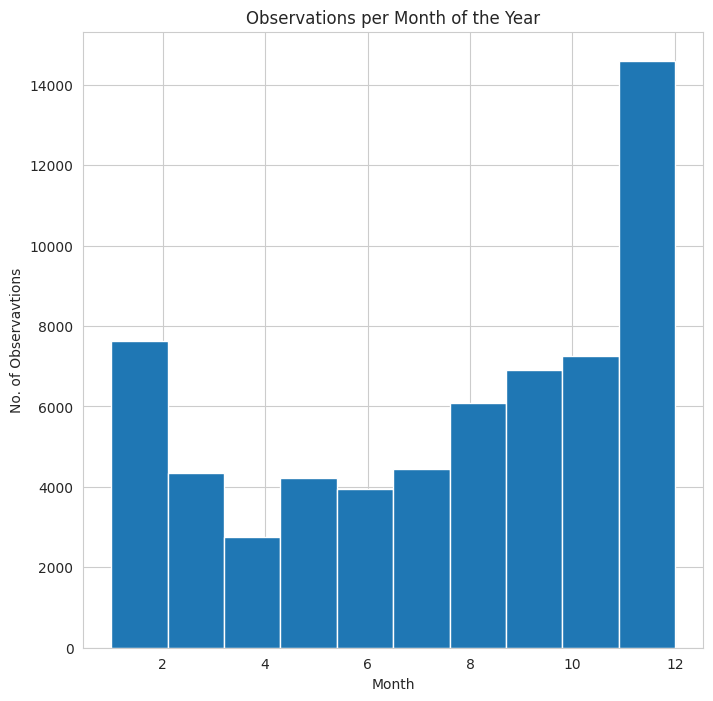

In [ ]:
plt.figure(figsize=(8, 8))

plt.hist(df['month'])
plt.title("Observations per Month of the Year")
plt.xlabel('Month')
plt.ylabel('No. of Observavtions')
plt.show()

=> Tháng 12 và tháng 1 đông người tập gym. Tháng 8, 9, 10 có vẻ tương đối với tháng 1

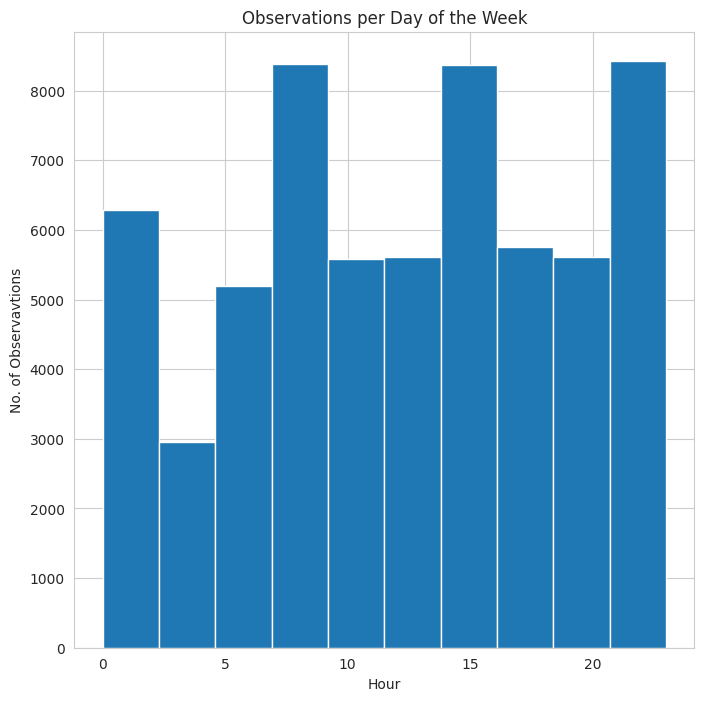

In [ ]:

plt.figure(figsize=(8, 8))

plt.hist(df['hour'])
plt.title("Observations per Day of the Week")
plt.xlabel('Hour')
plt.ylabel('No. of Observavtions')
plt.show()

=> Giờ tập gym cao điểm là 8-10 giờ sáng, 3 giờ chiều, và bất ngờ là nửa đêm cũng cao.

<Figure size 800x800 with 0 Axes>

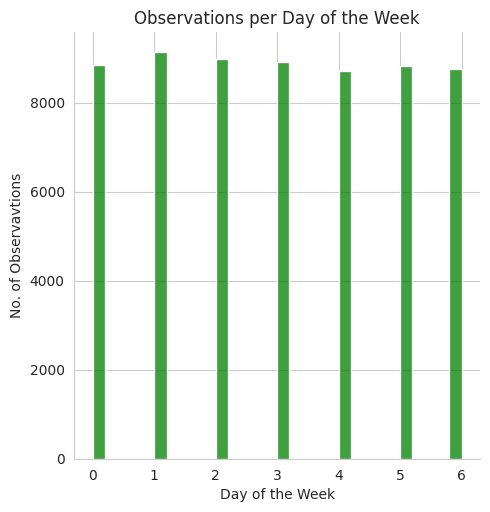

In [ ]:
plt.figure(figsize=(8, 8))

sns.displot(df['day_of_week'], color='g')
plt.title("Observations per Day of the Week")
plt.xlabel('Day of the Week')
plt.ylabel('No. of Observavtions')
plt.show()

=> không có gì thay đổi về ngày trong tuần.      
=> Có vẻ giờ và tháng có sự thay đổi mạnh

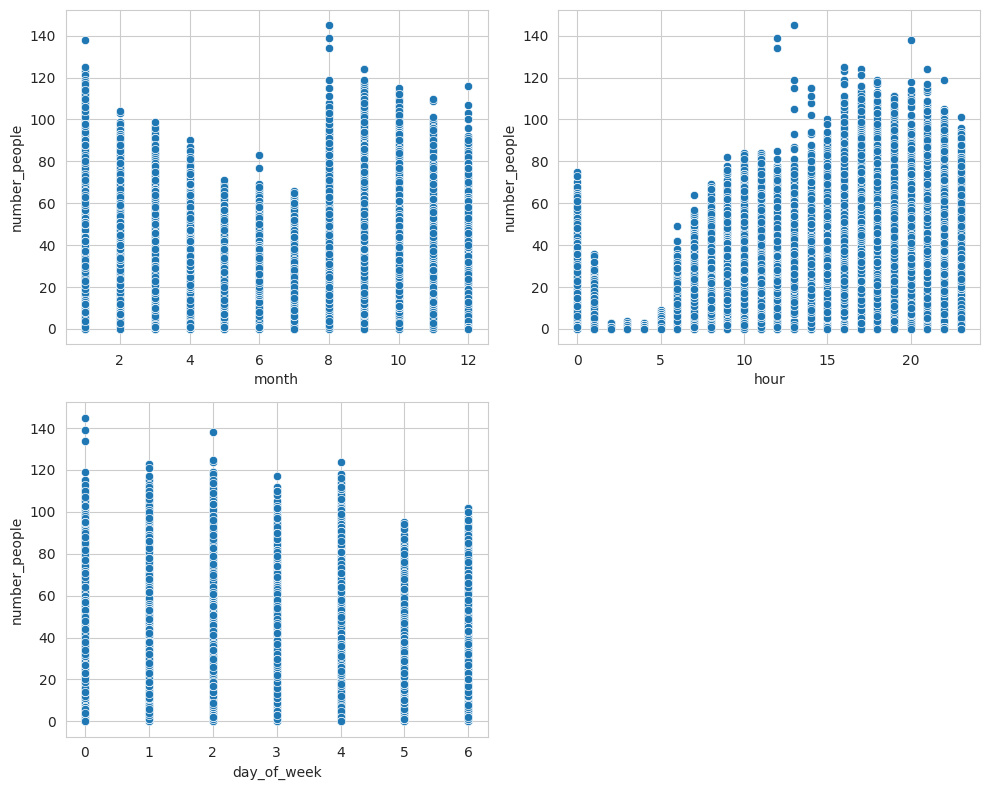

In [ ]:
plt.figure(figsize = (10, 8))
ax1 = plt.subplot(2, 2, 1)
ax2 = plt.subplot(2, 2, 2)
ax3 = plt.subplot(2, 2, 3)

cols = ["month", "hour", "day_of_week"]
for col, i in zip(cols, [ax1, ax2, ax3]):
    sns.scatterplot(data = df,  x = col, y = "number_people", ax = i)

plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='timestamp', ylabel='number_people'>

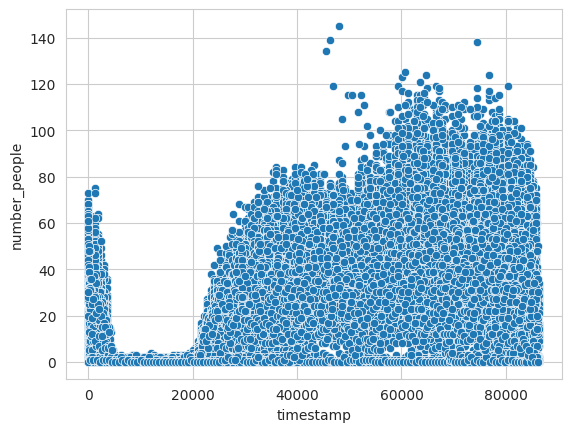

In [ ]:
sns.scatterplot(data = df,  x = "timestamp", y = "number_people")

In [ ]:
df.corr()["number_people"].sort_values(ascending = False)[1:6]

hour                    0.552049
timestamp               0.550218
temperature             0.373327
is_during_semester      0.335350
is_start_of_semester    0.182683
Name: number_people, dtype: float64

<AxesSubplot:>

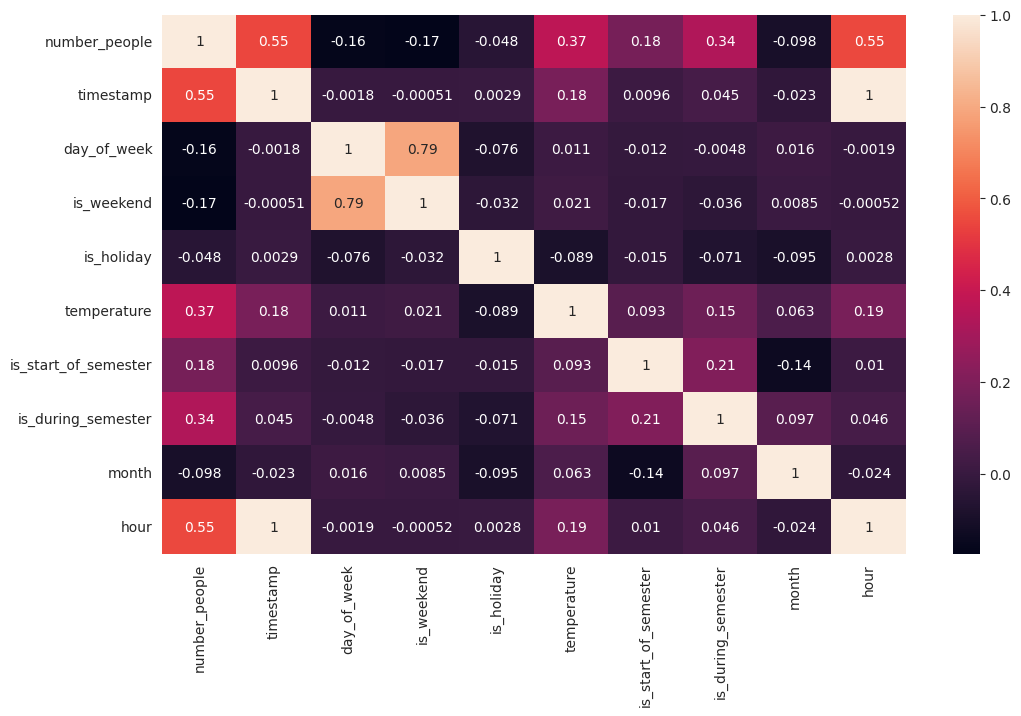

In [ ]:
plt.figure(figsize = (12, 7))
sns.heatmap(df.corr(), annot = True)

=> Dữ liệu này là về gym, nên có thể ngày cuối tuần hay thời điểm du lịch sẽ không có nhiều ảnh hưởng. Cũng dễ hiểu thôi, tập gym, tập thể dục là một thói quen hàng ngày, nên các ngày nghỉ, các sự kiện đặc biệt trong năm cũng không có tác động quá lớn.
Giả sử dữ liệu là số lượng lượt khác du lịch, thì có thể các biến tương quan âm sẽ thành dương.

In [ ]:
df.drop(["timestamp", "date",
         "is_weekend", "is_holiday"], axis = 1, inplace = True)

In [ ]:
df.head()

,number_people,day_of_week,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,71.76,0,0,8,17
1,45,4,71.76,0,0,8,17
2,40,4,71.76,0,0,8,17
3,44,4,71.76,0,0,8,17
4,45,4,71.76,0,0,8,17


# Preparing to Build Our Model

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor

from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [ ]:
X = df.drop("number_people", axis = 1)
y = df["number_people"]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 47, test_size = 0.2)

sdgr = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber',
         penalty='elasticnet', random_state = 52)

X_train_subset = X_train[["temperature", "is_start_of_semester", "is_during_semester", "hour"]]
X_test_subset = X_test[["temperature", "is_start_of_semester", "is_during_semester", "hour"]]

sdgr.fit(X_train_subset, y_train)

SGDRegressor(learning_rate='optimal', loss='huber', penalty='elasticnet',
             random_state=52)

# Measure the Performance of the Model

In [ ]:
y_pred = sdgr.predict(X_test_subset)
y_pred

array([38.96785501, 20.11855476, 29.56435315, ..., 46.88039693,
       37.18292845, 20.09919162])

In [ ]:
mean_squared_error(y_test, y_pred)

283.7883576139567

In [ ]:
mean_absolute_error(y_test, y_pred)

12.957062879253971

In [ ]:
r2_score(y_test, y_pred)

0.44700387109026263

=> mean_squared_error và mean_absolute_error khá cao (càng gần 0 thì độ chính xác càng cao), nghĩa là mô hình không chính xác đến mức đáng kinh ngạc. Với r2_score, chúng ta có thể thấy có mối tương quan là 0,447, điều này không quá tệ nhưng cũng không tốt đến mức vì chúng ta muốn nó càng gần 1 càng tốt.   
=> Chúng ta có thể cải thiện mô hình bằng StandScaler

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_subset)
X_test_scaled = scaler.transform(X_test_subset)

In [ ]:
sgd_new = SGDRegressor(alpha=0.0001, learning_rate='optimal', loss='huber',
    penalty='elasticnet', random_state = 52)

sgd_new.fit(X_train_scaled, y_train)
y_pred_new = sgd_new.predict(X_test_scaled)
y_pred_new

array([35.12084404, 18.65782243, 25.9907601 , ..., 43.88598471,
       34.69335372, 17.03234664])

In [ ]:
print(f"Mean squared error: {round( mean_squared_error(y_test, y_pred_new),3)}")
print(f"R2 score: {round(r2_score(y_test, y_pred_new),3)}")
print(f"Mean absolute error: { round(mean_absolute_error(y_test, y_pred_new),3)}")

Mean squared error: 279.326
R2 score: 0.456
Mean absolute error: 12.742


=> Không khá hơn là bao so với trước khi chuẩn hóa

# Residual

In [ ]:
residual_1 = y_test - y_pred
residual_2 = y_test - y_pred_new

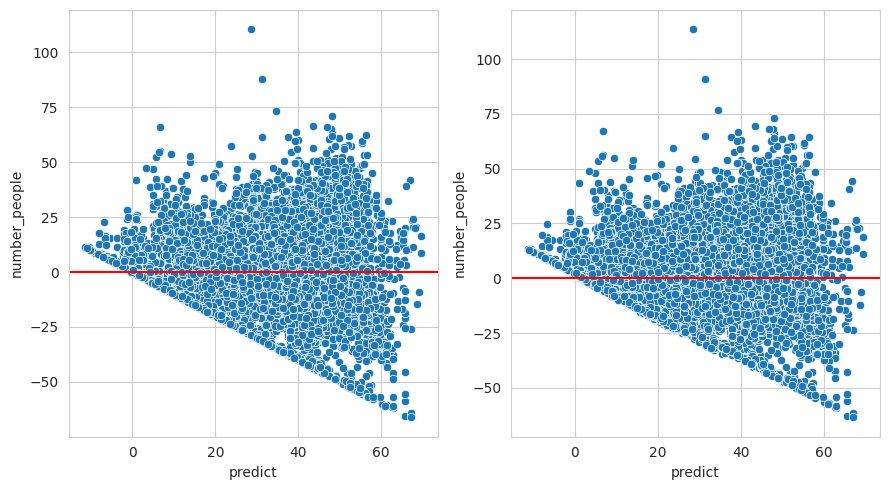

In [ ]:
plt.figure(figsize = (9, 5))
ax1 = plt.subplot(1, 2, 1)
ax2 = plt.subplot(1, 2, 2)

for re, j in zip([residual_1, residual_2], [ax1, ax2]):
    sns.scatterplot(x = y_pred, y = re, ax = j)
    j.set_xlabel("predict")
    j.axhline(y=0, color='red', linestyle='-')

plt.tight_layout()
plt.show()

=> Phản ánh đúng những gì trên trước đó, trước và sau chuẩn hóa cũng không có gì khác nhau quá lớn, như 2 giọt nước

# Visualize the Results

Text(0.5, 0, 'predict')

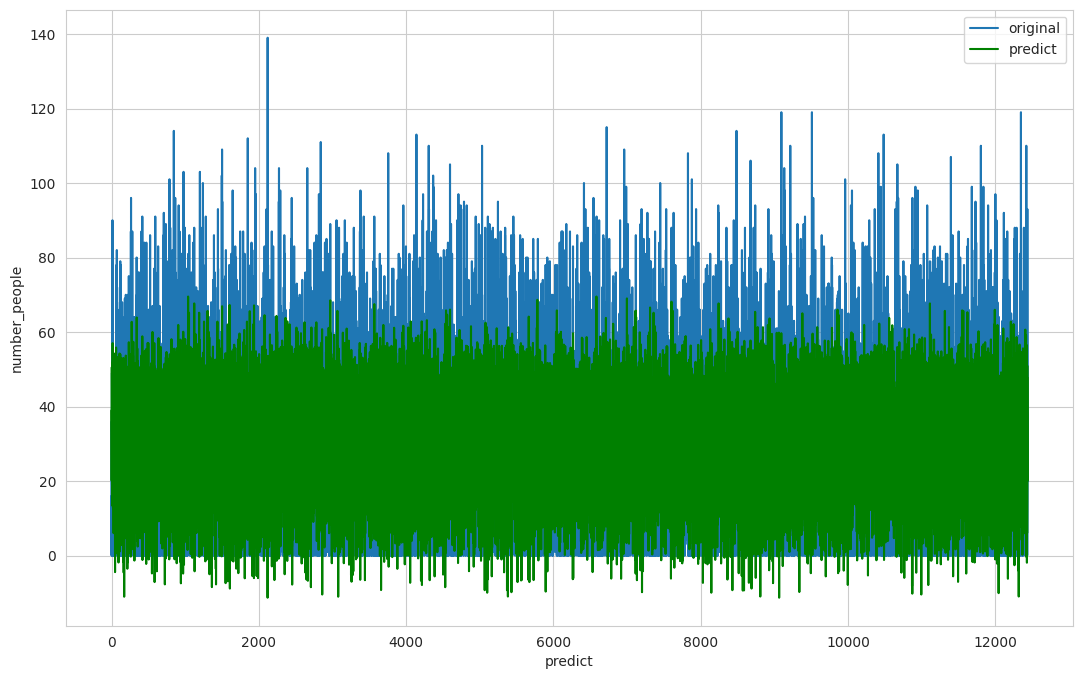

In [ ]:
plt.figure(figsize = (13, 8))

sns.lineplot(x = range(len(y_test)), y = y_test, label = "original")
sns.lineplot(x = range(len(y_test)), y = y_pred, color = "green", label = "predict")

plt.xlabel("predict")

=> Vẽ biểu đồ giữa giá trị dự đoán dựa trên tổng số hàng, và có vẻ như sai lệch rất nhiều

Text(0.5, 0, 'predict')

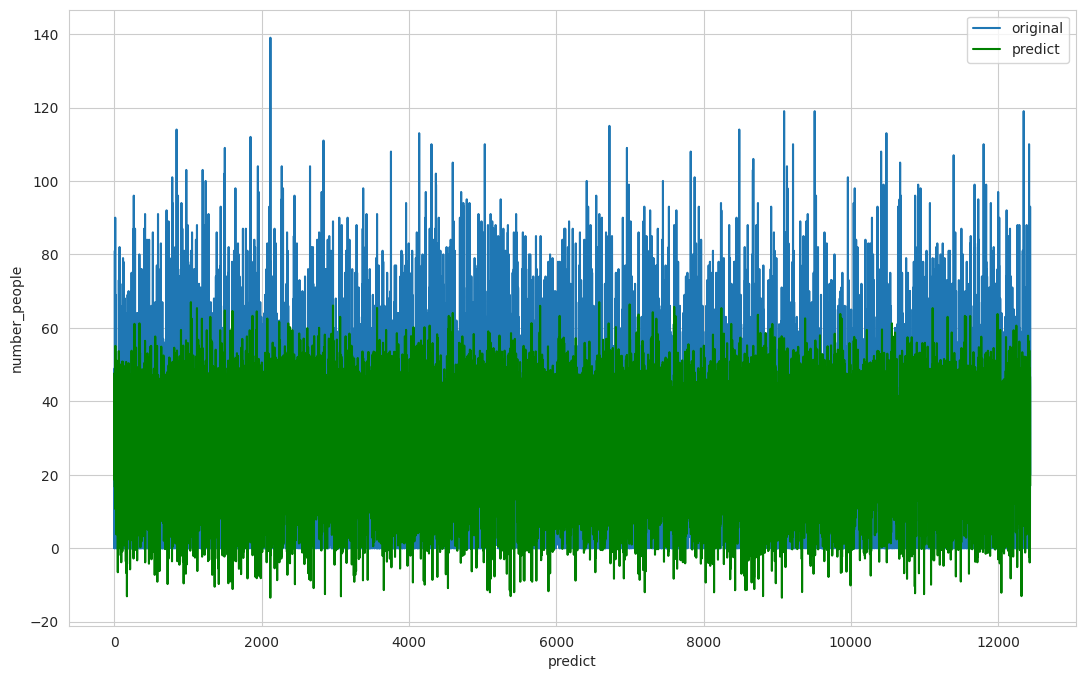

In [ ]:
plt.figure(figsize = (13, 8))

sns.lineplot(x = range(len(y_test)), y = y_test, label = "original")
sns.lineplot(x = range(len(y_test)), y = y_pred_new, color = "green", label = "predict")

plt.xlabel("predict")

Text(0.5, 1.0, 'Before StandScaler')

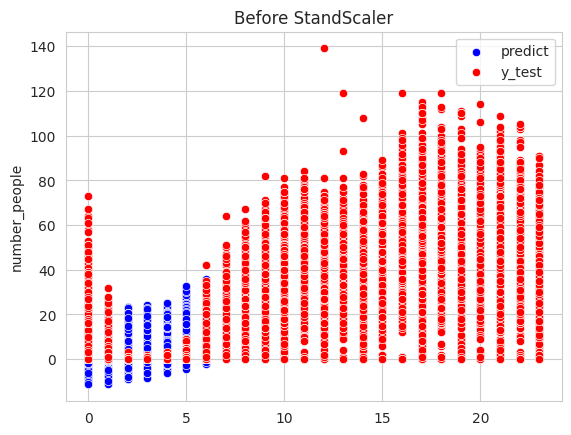

In [ ]:
sns.scatterplot(x = np.array(X_test["hour"]), y =  y_pred, color = "blue", label = "predict")
sns.scatterplot(x = np.array(X_test["hour"]), y = y_test, color = "red", label = "y_test")

plt.title("Before StandScaler")

Text(0.5, 1.0, 'After StandScaler')

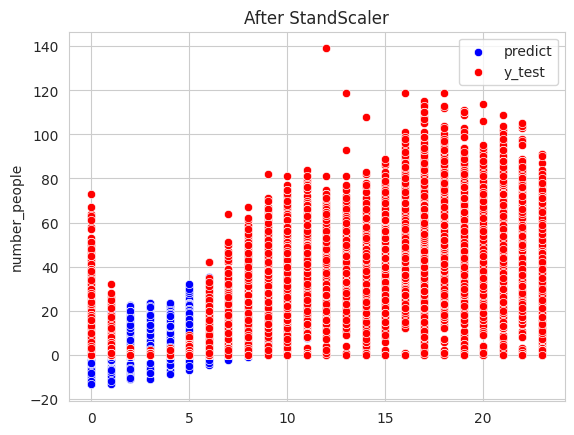

In [ ]:
sns.scatterplot(x = np.array(X_test["hour"]), y =  y_pred_new, color = "blue", label = "predict")
sns.scatterplot(x = np.array(X_test["hour"]), y = y_test, color = "red", label = "y_test")

plt.title("After StandScaler")

# Kết luận

Mô hình này có vẻ không tốt lắm, chỉ ở mứ 50% sự chính xác. Dự đoán thời điểm thích hợp là khoảng 0 - 5 giờ. Thì đúng rồi, giờ này tất cả đều đi ngủ rồi, nên trống là phải. Những dự đoán cũng không gì thay đổi, thời điểm hợp lý vẫn là 5 - 8 giờ sáng. Tập gym trước khi đi làm, đi học.....    
Chúng ta có thể sử dụng bằng cách thay đổi hàm mất mát, các siêu tham số....
